# TECHNICAL REPORT FOR CLASSIFICATION USING DIABETIC DATASET 


Group No-7
<br>Team Members
<br>Nabeel Khan - nkhan6@buffalo.edu 
<br>Vijaya Rana- vrana3@buffalo.edu 
<br>Pooja Chowdhury- poojac21@buffalo.edu 
<br>Nupur Gupta- nupurgup@buffalo.edu 
<br>Abhishek Ajay Pitale- apitale@buffalo.edu
<br>Vaibhav Mahajan- vaibhavf@buffalo.edu

## Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. The Information was extracted from the database for encounters that satisfied the following criteria.<br />
(1) It is an inpatient encounter (a hospital admission).<br />
(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.<br />
(3) The length of stay was at least 1 day and at most 14 days.<br />
(4) Laboratory tests were performed during the encounter.<br />
(5) Medications were administered during the encounter.<br />


The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.<br />

<h3>Objective </h3>
Using Machine Learning we are aiming to classify the patient into 1 of 3 categroies<br /> 
1) Readmitted within 30 days.<br />
2) Readmitted after 30 days.<br />
3) Not been Readmitted.



# Step 1-Making the necessary imports and data import for project


In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
data_read=pd.read_csv("diabetic_data.csv")
data_read

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Step 2 -Filtering out the patients

Explanation-Here we are trying to extract the necessary data for the analysis in the file called patients_groupby.xlsx
which we have extracted in the first code run.


Note -We have commented the code so that upon running the code from scratch the excel file is not created upon each run.
       
       


In [3]:
 #code for csv generation 
# data_read.groupby('patient_nbr').apply(lambda x: pd.Series([x.readmitted.nunique(),
#                                                             len(x),
#                                                             x.readmitted.iloc[-1],
#                                                             x.readmitted.value_counts().index[0],
#                                                             x.readmitted.value_counts().iloc[0]/len(x)],
#                                                            index = ['#target values',
#                                                                     '# records',
#                                                                     'last target',
#                                                                     'most popular target',
#                                                                     '% of most popular target'])).to_excel('patients_groupby.xlsx')

In [4]:
pd.read_excel('patients_groupby.xlsx')

,patient_nbr,# distinct target values,# records,last target,most popular target,(%) most popular target
0,135,2,2,>30,<30,0.5
1,378,1,1,NO,NO,1.0
2,729,1,1,NO,NO,1.0
3,774,1,1,NO,NO,1.0
4,927,1,1,NO,NO,1.0
...,...,...,...,...,...,...
71513,189351095,1,1,NO,NO,1.0
71514,189365864,1,1,NO,NO,1.0
71515,189445127,1,1,NO,NO,1.0
71516,189481478,1,1,>30,>30,1.0


## Step 3 - Removing the columns that are not required for the analysis from original Dataset

Explanation-We are aiming to find the columns that have atleast different values .It we don't have atleast 2 different values
then it does not make sense to include them ,because the data will be biased on one condition.To achieve this we are removing
those columns where unique value is <=1

Upon running the code we   we got 'examide', 'citoglipton' whuch satisfies above condition


We are also dropping the NAN values because it is unnecessary value which must be removed in order to analyze the data set properly


In [5]:
data_read = data_read.replace({'?':np.NaN, 'None':np.NaN})

Finding the NAN values in terms of there percentage and sorting in descending order to finding the top values .This will 
help us to identify the significant NAN columns

In [6]:
missing_vals = (data_read.isnull().sum()/len(data_read)).sort_values(ascending = False)
missing_vals

weight                      0.968585
max_glu_serum               0.947468
A1Cresult                   0.832773
medical_specialty           0.490822
payer_code                  0.395574
race                        0.022336
diag_3                      0.013983
diag_2                      0.003518
diag_1                      0.000206
encounter_id                0.000000
troglitazone                0.000000
tolbutamide                 0.000000
pioglitazone                0.000000
rosiglitazone               0.000000
acarbose                    0.000000
miglitol                    0.000000
citoglipton                 0.000000
tolazamide                  0.000000
examide                     0.000000
glipizide                   0.000000
insulin                     0.000000
glyburide-metformin         0.000000
glipizide-metformin         0.000000
glimepiride-pioglitazone    0.000000
metformin-rosiglitazone     0.000000
metformin-pioglitazone      0.000000
change                      0.000000
d

In [7]:
data_read.columns[data_read.apply(lambda x: x.nunique()) <= 1]

Index(['examide', 'citoglipton'], dtype='object')

In [8]:
data_read = data_read.drop(['examide', 'citoglipton'], axis=1)

We plan to drop columns which met the below conditions 

Condition 1-
We  will remove values where the proportion of one values dominates .For example in acetohexamide the value No dominates to 99%  and Steady 0.001% .Thus it is clear that data is imbalanced ,so we will drop them .

Condition 2- 
We will also be dropping only those where a signifcant value is domainates >95% and missing values are greater than 35%. <br />
with the exception of  A1Cresult','max_glu_serum' since they are important paramters in the dataset .


Condition 3- 

Columns which do not hold much importance for our dataset 


In [9]:
top2counts = (data_read.apply(lambda x: x.value_counts().values[:2] ).T)/ len(data_read)
top2counts.columns = ['c0', 'c1']

top2vals = data_read.apply(lambda x: x.value_counts().index[:2] ).T

top2 = pd.concat([top2vals,top2counts], axis= 1).sort_values('c0', ascending = False)
top2

,0,1,c0,c1
acetohexamide,No,Steady,0.999990,0.000010
metformin-pioglitazone,No,Steady,0.999990,0.000010
glimepiride-pioglitazone,No,Steady,0.999990,0.000010
metformin-rosiglitazone,No,Steady,0.999980,0.000020
troglitazone,No,Steady,0.999971,0.000029
glipizide-metformin,No,Steady,0.999872,0.000128
tolbutamide,No,Steady,0.999774,0.000226
miglitol,No,Steady,0.999627,0.000305
tolazamide,No,Steady,0.999617,0.000373
chlorpropamide,No,Steady,0.999155,0.000776


In [10]:
cols_to_drop = top2.index[top2['c0'] >= .95].tolist() \
               + missing_vals.index[missing_vals > .35].tolist()

In [11]:
disregard = ['A1Cresult','max_glu_serum']
cols_to_drop = [i for i in cols_to_drop if i not in disregard]


In [12]:
cols_to_drop

['acetohexamide',
 'metformin-pioglitazone',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'troglitazone',
 'glipizide-metformin',
 'tolbutamide',
 'miglitol',
 'tolazamide',
 'chlorpropamide',
 'acarbose',
 'nateglinide',
 'glyburide-metformin',
 'repaglinide',
 'weight',
 'medical_specialty',
 'payer_code']

Note - We have dropped the columns with only one value in more than 95% of records

In [13]:
data_read=data_read.drop(cols_to_drop, axis=1)

In [14]:
data_read.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [15]:
(data_read.isnull().sum()/len(data_read)).sort_values(ascending = False)

max_glu_serum               0.947468
A1Cresult                   0.832773
race                        0.022336
diag_3                      0.013983
diag_2                      0.003518
diag_1                      0.000206
diabetesMed                 0.000000
change                      0.000000
insulin                     0.000000
rosiglitazone               0.000000
pioglitazone                0.000000
glyburide                   0.000000
glipizide                   0.000000
glimepiride                 0.000000
metformin                   0.000000
number_diagnoses            0.000000
encounter_id                0.000000
patient_nbr                 0.000000
number_inpatient            0.000000
number_emergency            0.000000
number_outpatient           0.000000
num_medications             0.000000
num_procedures              0.000000
num_lab_procedures          0.000000
time_in_hospital            0.000000
admission_source_id         0.000000
discharge_disposition_id    0.000000
a

In [16]:
top2counts = (data_read.apply(lambda x: x.value_counts().values[:2] ).T)/ len(data_read)
top2counts.columns = ['c0', 'c1']

top2vals = data_read.apply(lambda x: x.value_counts().index[:2] ).T

top2 = pd.concat([top2vals,top2counts], axis= 1).sort_values('c0', ascending = False)
top2

,0,1,c0,c1
glimepiride,No,Steady,0.948991,0.045890
rosiglitazone,No,Steady,0.937455,0.059941
pioglitazone,No,Steady,0.927992,0.068549
glyburide,No,Steady,0.895348,0.091131
number_emergency,0,1,0.888145,0.075438
glipizide,No,Steady,0.875341,0.111589
number_outpatient,0,1,0.835515,0.083987
metformin,No,Steady,0.803589,0.180276
diabetesMed,Yes,No,0.770031,0.229969
race,Caucasian,AfricanAmerican,0.747784,0.188766


After Analyzing the columns for the null values ,we figured out that none has value greater tha 95% so we can't drop them
but we can remove the insignificant columns which does not hold much importance


We check if from the read dataset any column starts with id or nbr ,and figured out that
'patient_nbr', 'readmitted', 'encounter_id'are not required futher and drop them since they met the condition 3 .

In [17]:
[i for i in data_read.columns if ('id' in i.lower() or 'nbr' in i.lower())]

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'glimepiride',
 'glipizide',
 'glyburide']

In [18]:
X = data_read.drop([
    'patient_nbr', 'readmitted', 'encounter_id'], axis =1 )

Now preparing data for One hot encoding
Here few columns below are categorical ,but in the dataset they are present as numeric values.
So we will covert them into string so that we can further use them 

In [19]:
X[['admission_type_id',
   'discharge_disposition_id',
   'admission_source_id']] = X[['admission_type_id',
                                'discharge_disposition_id',
                                'admission_source_id']].astype(str)

In [20]:
X.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


Now ,the age is not in the proper format ,we can't deduce any analysis from it.To resolve this problem we will be taking
the mean .For example for age [0-10) we will take the mean to be 5 .
                               

In [21]:
X['age'] = X.age.apply(lambda x: (int(x.split('-')[0][1:]) + int(x.split('-')[1][:-1]))/2)

In [22]:
X['age'].head()

0     5.0
1    15.0
2    25.0
3    35.0
4    45.0
Name: age, dtype: float64

## Step 4 - Performing One Hot Encoding

Analysizing the data type for the features

In [23]:
X.apply(lambda x: [x.nunique(), x.dtype]).T

,0,1
race,5,object
gender,3,object
age,10,float64
admission_type_id,8,object
discharge_disposition_id,26,object
admission_source_id,17,object
time_in_hospital,14,int64
num_lab_procedures,118,int64
num_procedures,7,int64
num_medications,75,int64


Since diag_1,diag_2,diag_3 has significant meaning .Below is the description

Diagnosis 1-The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2-Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3-Nominal	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

We made the excel called (diagnosis_mapping.xlsx) to map what each code refers to to have better understanding. 
For example code from 1-139 comes under category "infectious and parasitic diseases".
So overall range for code is 1-999

The link for the codes is as below
https://en.wikipedia.org/wiki/List_of_ICD-9_codes

### Processing needed for diag_1, diag_2, diag_3

In [24]:
diag_map = pd.read_excel('diagnosis_mapping.xlsx')

In [25]:
diag_map

,lower,upper,category
0,1,139,infectious and parasitic diseases
1,140,239,neoplasms
2,240,279,"endocrine, nutritional and metabolic diseases,..."
3,280,289,diseases of the blood and blood-forming organs
4,290,319,mental disorders
5,320,389,diseases of the nervous system and sense organs
6,390,459,diseases of the circulatory system
7,460,519,diseases of the respiratory system
8,520,579,diseases of the digestive system
9,580,629,diseases of the genitourinary system


In [26]:
diag_map.loc[0,'lower'] = 0
diag_map.loc[17,'lower'] = 1000

In [27]:
def attempt_numeric(inp):
    try:
        float(inp)
        return True
    except:
        return False

In [28]:
X.diag_1[~X.diag_1.apply(attempt_numeric)]

23        V57
42        V57
111       V58
253       V57
290       V57
         ... 
101081    V57
101127    V53
101185    V57
101265    V57
101275    V58
Name: diag_1, Length: 1645, dtype: object

In [29]:
X.diag_1[~X.diag_1.apply(attempt_numeric)].apply(lambda x: x[0]).value_counts()

V    1644
E       1
Name: diag_1, dtype: int64

In [30]:
X['diag_1_additional'] = 0
X['diag_2_additional'] = 0
X['diag_3_additional'] = 0

In [32]:
X['diag_1_additional'] = X['diag_1_additional'].astype(int)
X['diag_2_additional'] = X['diag_2_additional'].astype(int)
X['diag_3_additional'] = X['diag_3_additional'].astype(int)

In [34]:
X['diag_1'] = X['diag_1'].astype(float)
X['diag_2'] = X['diag_2'].astype(float)
X['diag_3'] = X['diag_3'].astype(float)

In [35]:
X['diag_1'] = pd.cut(x=X.diag_1, bins=diag_map.lower)
X['diag_2'] = pd.cut(x=X.diag_2, bins=diag_map.lower)
X['diag_3'] = pd.cut(x=X.diag_3, bins=diag_map.lower)

In [36]:
X.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,5.0,15.0,25.0,35.0,45.0
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


We will do one hot encoding for this we will use get_dummies function.

Now get_dummies() is a function from Pandas that performs dummy encoding in a single line of code
The get_dummies() function from the Pandas library can be used to convert a categorical variable into dummy/indicator variables. 

It is in a way a static technique for encoding in its behavior.

In [37]:
pd.get_dummies(X).shape

(101766, 160)

In [38]:
X = pd.get_dummies(X)

# Step 5- Model Evaluation Using Random Forest

Performing the necessary imports and keeping test size 33%  
The target variable is readmitted 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [40]:
y = data_read['readmitted'].astype(str)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1,stratify=y)

#### Performing the GridSearchCV to find best parameters

Grid search is the process of tuning hyperparameters to find the best values for a given model. 
This is significant since the hyper parameter values supplied determine the model's overall performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [5, 100, 300],
              'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .005],
              'max_depth' : [3 , 5, 7],  # 3,5, 7
              'min_samples_split': [10, 30],
             }
model = RandomForestClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=True)
grid_search.fit(X_train, y_train)

Evaluating the best parameters below 

In [43]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(ccp_alpha=0.1, max_depth=3, max_features='sqrt',
                       min_samples_split=10, n_estimators=5, random_state=1024)

Checking the accuracy X_train and X_test

In [44]:
accuracy_score(y_train, final_model.predict(X_train))

0.5391226552073097

In [45]:
accuracy_score(y_test, final_model.predict(X_test))

0.5391120507399577

Result-The train accuracy is more while the test accuray is less.

Hence Overfitting is there and hyperparameter tuning , and other model testing required

Before that we will perform feature enginerring using RandomForestClassifier

# Step 6 -Feature enginnering to find the best features

Checking the feature importance for analysis and plotting it with RandomForestClassifier

In [46]:
rf_model=RandomForestClassifier()

In [47]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
feature_imp = pd.Series(rf_model.feature_importances_, X.columns)

For better understanding we are plotting the feature_imp

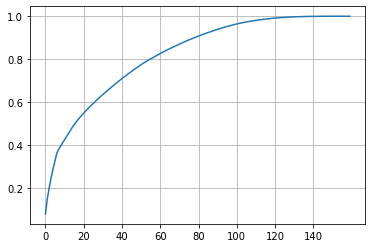

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(feature_imp.sort_values(ascending=False).cumsum())
ax.set_xticks([20*i for i in range(8)])
ax.set_xticklabels([ 20*i for i in range(8)])

plt.grid()

#fig1 

Note - The fig 1 above graph clearly states that that 40 features play an important role in the dataset

Undertanding the  above results through barplot 

<AxesSubplot:>

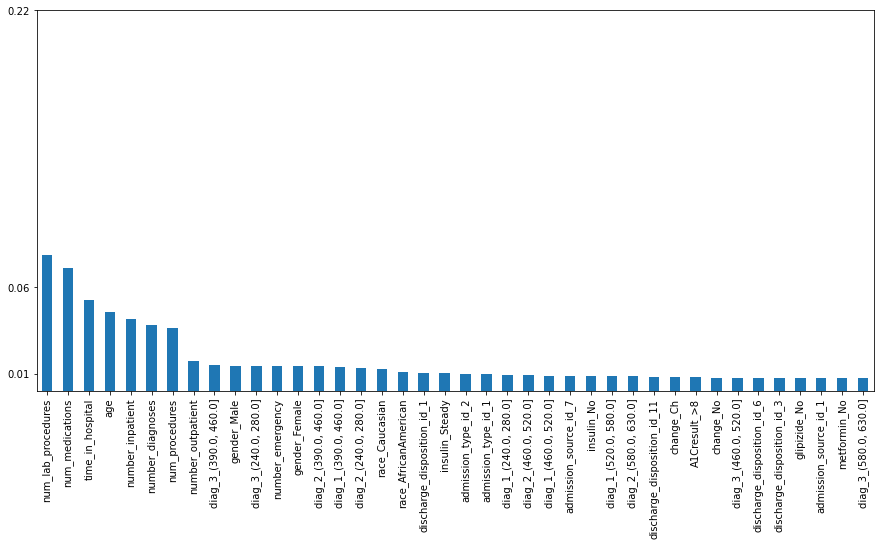

In [62]:
feature_imp.sort_values(ascending=False)[:40].plot(kind= 'bar', figsize=(15, 7), yticks = [.01,.06,.22])
#fig2 

<AxesSubplot:>

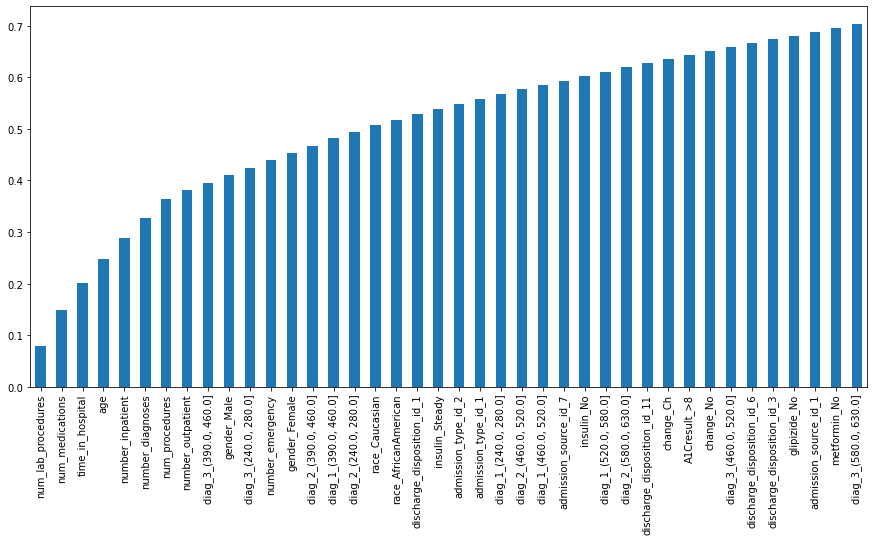

In [63]:
feat_agg = feature_imp.sort_values(ascending=False)[:40].cumsum()
feat_agg.sort_values().plot(kind= 'bar', figsize=(15, 7))

#fig 3

Note that this graph follows the same curve as obtained in the fig 1

# Step 7 - Model Evaluation using Decision Tree

## Training with Decision Tree

We are using the GridSearchCv to perform hyperparameter tuning,
in order to determine the optimal values for a given model

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.model_selection import GridSearchCV

# leaf size , decrease max depth
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .005],
              'max_depth' : [3,5,7, 10],
              'min_samples_leaf': [2, 10],
              'min_samples_split': [2, 10],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=3, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.005],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]},
             verbose=True)

Now finding the best estimator for the model we get .

In [55]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=3,
                       max_features='log2', min_samples_leaf=2,
                       random_state=1024)

Checking the accuracy on X_train

In [64]:
accuracy_score(y_train, final_model.predict(X_train))

0.5479518355015179

Checking the accuracy of X_test

In [65]:
accuracy_score(y_test, final_model.predict(X_test))

0.5481642497692285

# Results And Conclusion

We tried a lot of variations for Random Forest and Decision Tree, and we were able to predict if a patient is <br />1) Readmitted within 30 days.<br />
2) Readmitted after 30 days.<br />
3) Not been Readmitted. <br />
with ~55% of Accuracy.

We also observed that ~40 features were adding up for 70% feature importance using Random Forest.

# References 

Datset Extraction

https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Attribute Information

https://www.hindawi.com/journals/bmri/2014/781670/
    
Relevant Paperwork 

https://www.hindawi.com/journals/bmri/2014/781670/